# **HYPOTHESIS TESTING IN WOMEN'S AND MEN'S GOAL SCORED IN FIFA WORLD CUPS**

![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [6]:
# Start your code here!
import pandas as pd
import numpy as np


In [7]:
men_results = pd.read_csv('/home/kwesi/Documents/projects/data_science/Analysis/Hypothesis Testing On Mens & Womens Goals in World Cups/workspace/men_results.csv',index_col=0, parse_dates=['date'])
women_results = pd.read_csv('/home/kwesi/Documents/projects/data_science/Analysis/Hypothesis Testing On Mens & Womens Goals in World Cups/workspace/women_results.csv', index_col=0, parse_dates=['date'])

In [8]:
men_wc_results = men_results[men_results['tournament']=='FIFA World Cup']
women_wc_results = women_results[women_results['tournament']=='FIFA World Cup']

In [9]:
men_wc_results['total_score'] = men_wc_results['home_score'] + men_wc_results['away_score']
women_wc_results['total_score'] = women_wc_results['home_score'] + women_wc_results['away_score']

/tmp/ipykernel_23807/1363664537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_wc_results['total_score'] = men_wc_results['home_score'] + men_wc_results['away_score']
/tmp/ipykernel_23807/1363664537.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_wc_results['total_score'] = women_wc_results['home_score'] + women_wc_results['away_score']


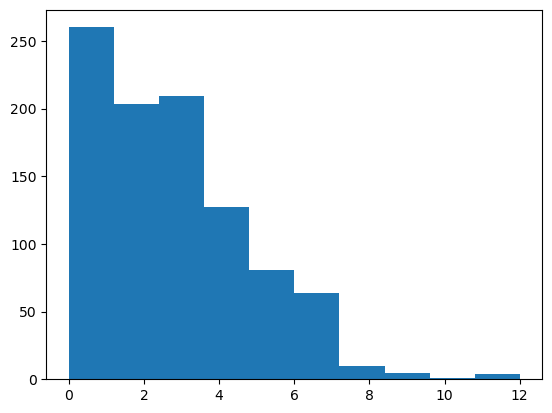

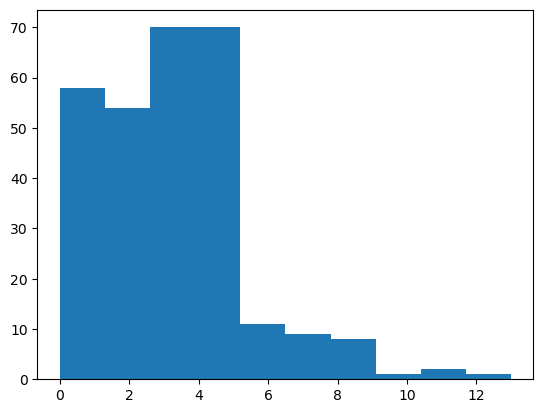

In [10]:
import matplotlib.pyplot as plt

plt.hist(x = men_wc_results['total_score'])
plt.show()

plt.hist(x = women_wc_results['total_score'])
plt.show()

In [11]:
# Creating a mean_bootsrap_distribution using sample of 500 we collect - cofee_samp
import numpy as np

mean_mens_score = []
for i in range(5000):
    mean_mens_score.append(np.mean(men_wc_results.sample(frac=1, replace=True,)['total_score'])
)
men_bootstrap_distn = mean_mens_score

(array([   4.,   56.,  292.,  846., 1402., 1261.,  789.,  268.,   70.,
          12.]),
 array([2.77816901, 2.86830986, 2.9584507 , 3.04859155, 3.13873239,
        3.22887324, 3.31901408, 3.40915493, 3.49929577, 3.58943662,
        3.67957746]),
 <BarContainer object of 10 artists>)

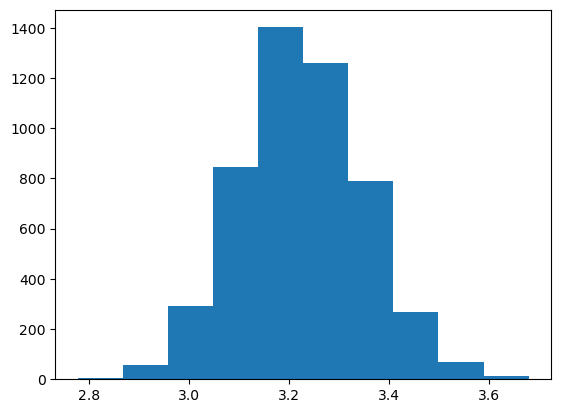

In [12]:
import numpy as np
import matplotlib.pyplot as plt

mean_womens_score = []
for i in range(5000):
    mean_womens_score.append(np.mean(women_wc_results.sample(frac=1, replace=True)['total_score'])
)
women_bootstrap_distn = mean_womens_score
plt.hist(x=women_bootstrap_distn)

In [13]:
mens_mean = np.mean(men_bootstrap_distn)
mens_mean

2.8204107883817424

In [14]:
womens_mean = np.mean(women_bootstrap_distn)
womens_mean

3.226907746478873

In [15]:
xbar_men = men_wc_results['total_score'].mean()
xbar_women = women_wc_results['total_score'].mean()
print(xbar_men,':', xbar_women, 'xbar\n\n')

std_men = men_wc_results['total_score'].std()
std_women = women_wc_results['total_score'].std()
print(std_men,':',std_women,'std dev\n\n')

num_men = men_wc_results['total_score'].count()
num_women = women_wc_results['total_score'].count()
print(num_men,':', num_women, 'Num of observations\n\n')

2.8215767634854774 : 3.2288732394366195 xbar


1.927370545711734 : 2.0610155987674186 std dev


964 : 284 Num of observations




In [16]:
numerator = xbar_women - xbar_men
denominator = np.sqrt(std_women **2 / num_women + std_men ** 2 / num_men)
t_stat = numerator / denominator
print('t_stat', t_stat)

t_stat 2.969687790230784


In [17]:
dof = num_men + num_women - 2
dof

1246

In [18]:
from scipy.stats import t

p_val = 1 - t.cdf(t_stat, df = dof)
p_val

0.0015190388733348215

In [19]:
result_dict = {"p_val": p_val, "result": 'reject'}
result_dict

{'p_val': 0.0015190388733348215, 'result': 'reject'}

/tmp/ipykernel_23807/2234062715.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  men_subset["group"] = "men"
/tmp/ipykernel_23807/2234062715.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  women_subset["group"] = "women"
/tmp/ipykernel_23807/2234062715.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

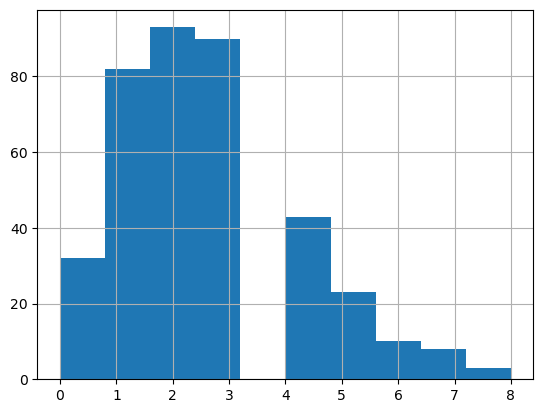

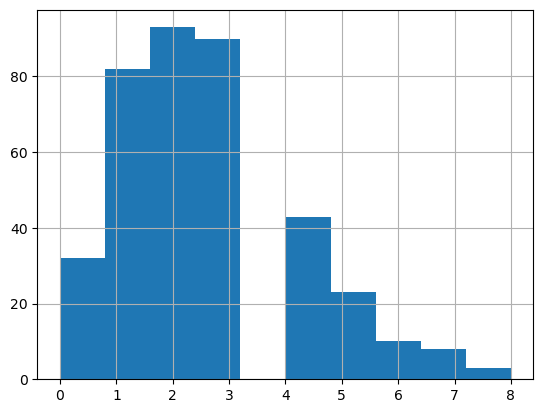

{'p_val': 0.005106609825443641, 'result': 'reject'}

<Figure size 640x480 with 0 Axes>

In [21]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import pingouin
from scipy.stats import mannwhitneyu

# Load men's and women's datasets
men = pd.read_csv("men_results.csv")
women = pd.read_csv("women_results.csv")

# Filter the data for the time range and tournament
men["date"] = pd.to_datetime(men["date"])
men_subset = men[(men["date"] > "2002-01-01") & (men["tournament"].isin(["FIFA World Cup"]))]
women["date"] = pd.to_datetime(women["date"])
women_subset = women[(women["date"] > "2002-01-01") & (women["tournament"].isin(["FIFA World Cup"]))]

# Create group and goals_scored columns
men_subset["group"] = "men"
women_subset["group"] = "women"
men_subset["goals_scored"] = men_subset["home_score"] + men_subset["away_score"]
women_subset["goals_scored"] = women_subset["home_score"] + women_subset["away_score"]

# Determine normality using histograms
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Goals scored is not normally distributed, so use Wilcoxon-Mann-Whitney test of two groups
men_subset["goals_scored"].hist()
plt.show()
plt.clf()

# Combine women's and men's data and calculate goals scored in each match
both = pd.concat([women_subset, men_subset], axis=0, ignore_index=True)

# Transform the data for the pingouin Mann-Whitney U t-test/Wilcoxon-Mann-Whitney test
both_subset = both[["goals_scored", "group"]]
both_subset_wide = both_subset.pivot(columns="group", values="goals_scored")

# Perform right-tailed Wilcoxon-Mann-Whitney test with pingouin
results_pg = pingouin.mwu(x=both_subset_wide["women"],
                          y=both_subset_wide["men"],
                          alternative="greater")

# Alternative SciPy solution: Perform right-tailed Wilcoxon-Mann-Whitney test with scipy
results_scipy = mannwhitneyu(x=women_subset["goals_scored"],
                             y=men_subset["goals_scored"],
                             alternative="greater")

# Extract p-value as a float
p_val = results_pg["p-val"].values[0]

# Determine hypothesis test result using sig. level
if p_val <= 0.01:
    result = "reject"
else:
    result = "fail to reject"

result_dict = {"p_val": p_val, "result": result}
result_dict

## **We are satisfied that more goals are scored in Women's World Cup than Men's World CUu**